# Loading Datasets

In [43]:
from Logistic_Regression.models.utils import loadData

x, y = loadData()

In [44]:
x.head()

3.8915  4.2105
0  3.6898  6.6051
1  2.7763  7.5057
2  3.1137  5.7724
3  2.9251  5.4315
4  3.6699  6.4406

In [45]:
y.head()

0
0  0
1  0
2  0
3  0
4  0

# Normalisation

In [46]:
from Logistic_Regression.models.utils import MinMaxScaler

scaler = MinMaxScaler()
xNorm = scaler.fitTransform(x)
yNorm = scaler.fitTransform(y)

In [47]:
xNorm.head()

3.8915    4.2105
0  0.322538  0.849108
1  0.191576  1.000000
2  0.239947  0.709592
3  0.212908  0.652475
4  0.319685  0.821546

In [48]:
yNorm.head()

0
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0

# BGD until convergence with learning rate = 0.1

In [49]:
from Logistic_Regression.models.utils import LogisticRegression
import numpy as np

model = LogisticRegression()
lr = 0.1
finCost = model.fit(xNorm, yNorm, epochs=5000, learning_rate=lr)
eg = np.array([[xNorm.mean().iloc[0], yNorm.mean().iloc[0]]])
yHat = model.predict(eg)
print(f"Prediction for input ({eg}) =", yHat[0][0])
print(f"Final cost = {finCost}")
print(f"Parameters:\tw = {model.w}, b = {model.b}")

Prediction for input ([[0.45676353 0.50505051]]) = 1
Final cost = 0.37787475909925594
Parameters:	w = [[ 6.91479057]
 [-6.96696498]], b = 0.4863303181144615


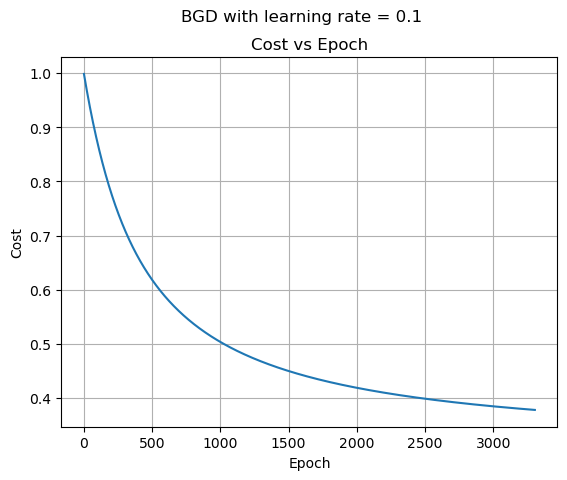

In [50]:
model.plotCost(f"BGD with learning rate = {lr}")

# Decision Boundary

In [51]:
model.decisionBoundary(x, y, subtitle=f"Learning rate = {0.1}")

# Confusion Matrix

In [52]:
yHat = model.predict(x)
cm = model.confusionMatrix(y, yHat)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[42  4]
 [ 8 45]]


# Classification Report

In [53]:
accuracy, precision, recall, f1Score = model.classificationReport(y, yHat)
print("Classification Report:")
print(f"Accuracy = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1-Score = {f1Score}")

Classification Report:
Accuracy = 0.46464646464646464
Precision = 0.84
Recall = 0.4827586206896552
F1-Score = 0.6131386861313869


# BGD up to 100 epochs with learning rate = 0.1

Prediction for input ([[0.45676353 0.50505051]]) = 0


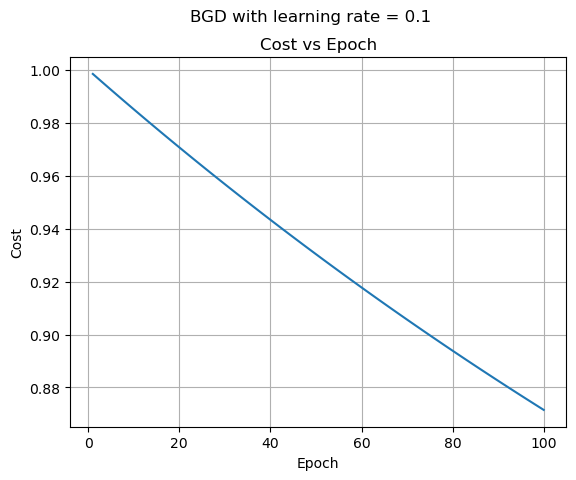

In [54]:
from Logistic_Regression.models.utils import LogisticRegression

lr = 0.1
model = LogisticRegression()
model.fit(xNorm, yNorm, epochs=100, learning_rate=lr)
yHat = model.predict(eg)
costs1 = model.costs
print(f"Prediction for input ({eg}) =", yHat[0][0])
model.plotCost(f"BGD with learning rate = {lr}")

Prediction for input ([[0.45676353 0.50505051]]) = 1


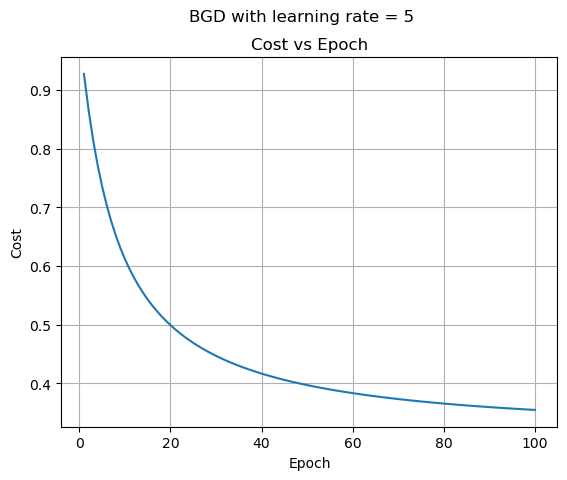

In [55]:
from Logistic_Regression.models.utils import LogisticRegression

lr = 5
model = LogisticRegression()
model.fit(xNorm, yNorm, epochs=100, learning_rate=lr)
yHat = model.predict(eg)
costs2 = model.costs
print(f"Prediction for input ({eg}) =", yHat[0][0])
model.plotCost(f"BGD with learning rate = {lr}")

# Comparison

In [56]:
from Logistic_Regression.models.utils import compareCosts

compareCosts(costs1, costs2, epochs=100, subtitle=f"Learning rates = 0.1 vs 5")